In [1]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Flatten

C:\Users\DELL\AppData\Roaming\Python\Python313\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
C:\Users\DELL\AppData\Roaming\Python\Python313\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
C:\Users\DELL\AppData\Roaming\Python\Python313\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/resource_handle.proto. Please upd

In [4]:
# prepare independent features and dependent features
def prepare_data(timeseries_data, n_features):
    X, y = [], []
    for i in range(len(timeseries_data)):
        end_ix = i + n_features # 0->3, 1->4, 2->5, 
        if end_ix > len(timeseries_data) - 1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [5]:
# define input sequence
timeseries_data = [110, 125, 133, 146, 158, 172, 187, 196, 210]

# choose a number of time steps
n_steps = 3

# split into samples
X, y = prepare_data(timeseries_data, n_steps)

In [6]:
print(X)
print(y)

[[110 125 133]
 [125 133 146]
 [133 146 158]
 [146 158 172]
 [158 172 187]
 [172 187 196]]
[146 158 172 187 196 210]


In [7]:
X.shape, y.shape

((6, 3), (6,))

In [8]:
# reshape from [samples, timesptes] into [samples, timesteps, features]
n_features = 1
X = X.reshape(X.shape[0], X.shape[1], n_features)

In [9]:
X.shape

(6, 3, 1)

# Building LSTM Model

In [11]:
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# fit model
model.fit(X, y, epochs=300, verbose=0)

C:\Users\DELL\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


# Predicting for the next 10 days

In [12]:
x_input = np.array([187, 196, 210])
temp_input = list(x_input)
lst_output = []
i = 0
while(i<10):
    if (len(temp_input) > 3):
        x_input = np.array(temp_input[1:])
        # print(x_input)
        print("{} day input: {}".format(i, x_input))
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output: {}".format(i, yhat[0][0]))
        print()
        temp_input.append(yhat[0][0])
        temp_input = temp_input[1:]
        # print(temp_input)
        lst_output.append(yhat[0][0])
        i = i + 1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        # print(yhat.shape)
        # print(yhat[0][0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i = i + 1

1 day input: [196.         210.         225.30316162]
1 day output: 237.72898864746094

2 day input: [210.         225.30316162 237.72898865]
2 day output: 252.55450439453125

3 day input: [225.30316 237.72899 252.5545 ]
3 day output: 267.6623229980469

4 day input: [237.72899 252.5545  267.66232]
4 day output: 282.310791015625

5 day input: [252.5545  267.66232 282.3108 ]
5 day output: 298.2347412109375

6 day input: [267.66232 282.3108  298.23474]
6 day output: 314.50146484375

7 day input: [282.3108  298.23474 314.50146]
7 day output: 331.1453552246094

8 day input: [298.23474 314.50146 331.14536]
8 day output: 348.7045593261719

9 day input: [314.50146 331.14536 348.70456]
9 day output: 366.8428039550781



# Visualizing the output

In [14]:
import matplotlib.pyplot as plt 

In [16]:
timeseries_data

[110, 125, 133, 146, 158, 172, 187, 196, 210]

In [21]:
lst_output

[np.float32(225.30316),
 np.float32(237.72899),
 np.float32(252.5545),
 np.float32(267.66232),
 np.float32(282.3108),
 np.float32(298.23474),
 np.float32(314.50146),
 np.float32(331.14536),
 np.float32(348.70456),
 np.float32(366.8428)]

In [18]:
day_new = np.arange(1, 10)
day_pred = np.arange(10, 20)

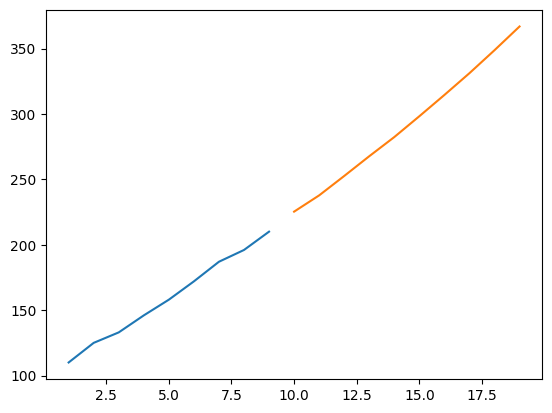

In [19]:
plt.plot(day_new, timeseries_data)
plt.plot(day_pred, lst_output)